In [1]:
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


import matplotlib.pyplot as plt
%matplotlib inline

# Data Preparation & Exploration

In [2]:
pwd

'C:\\Users\\mark\\Documents\\tempMLYork\\ML1040'

In [3]:
cd desktop

[WinError 2] The system cannot find the file specified: 'desktop'
C:\Users\mark\Documents\tempMLYork\ML1040


In [4]:
data = pd.read_csv("ResultML6.csv") 

c:\users\mark\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (96,105,106,107) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
# Preview the first 5 lines of the loaded data 
data.head()

,Unnamed: 0,Specialty,rule2Flag,ClaimID,PatientID,DoctorID,GroupID,DoctorGroupID,PracticeID,InsuID,Diag1,Diag2,Diag3,Diag4,DOSFrom1,DOSTo1,PlaceOfService1,TypeOfService1,Proc1,Modifier1,AddModifier1,DiagCode1,Charges1,DaysOfUnit1,EMG1,COB1,CLIA1,DOSFrom2,DOSTo2,PlaceOfService2,TypeOfService2,Proc2,Modifier2,AddModifier2,DiagCode2,Charges2,DaysOfUnit2,EPSDT2,EMG2,COB2,CLIA2,DOSFrom3,DOSTo3,PlaceOfService3,TypeOfService3,Proc3,Modifier3,AddModifier3,DiagCode3,Charges3,DaysOfUnit3,EPSDT3,EMG3,COB3,CLIA3,DOSFrom4,DOSTo4,PlaceOfService4,TypeOfService4,Proc4,Modifier4,AddModifier4,DiagCode4,Charges4,DaysOfUnit4,EPSDT4,EMG4,COB4,CLIA4,DOSFrom5,DOSTo5,PlaceOfService5,TypeOfService5,Proc5,Modifier5,AddModifier5,DiagCode5,Charges5,DaysOfUnit5,EPSDT5,EMG5,COB5,CLIA5,DOSFrom6,DOSTo6,PlaceOfService6,TypeOfService6,Proc6,Modifier6,AddModifier6,DiagCode6,Charges6,DaysOfUnit6,EPSDT6,EMG6,COB6,CLIA6,DosFromMin,DosToMax,FacZip,FacPhone,FacID,TaxonomyCode,PatZip,PatPhone,PatEmployerName,PatEmployerAddress,PatEmployerPhone,PatIsPrimary,DoctorTaxonomyCode,ReferDoctorID,FacilityID,Diag5,Diag6,Diag7,Diag8,Diag9,Diag10,Diag11,Diag12
0,0,NaN,False,NY5925216,NY619557,NY6752,NY6682,NY6682,NY308,13,R42,G60.3,M54.12,M54.16,5/1/2019,5/1/2019,11,1,99214,25,NaN,ABCD,127.42,1,NaN,NaN,NaN,NaN,NaN,,,NaN,NaN,NaN,NaN,NaN,0.0,',NaN,NaN,NaN,NaN,NaN,,,NaN,NaN,NaN,NaN,NaN,0.0,',NaN,NaN,NaN,NaN,NaN,,,NaN,NaN,NaN,NaN,NaN,0.0,',NaN,NaN,NaN,NaN,NaN,,,NaN,NaN,NaN,NaN,NaN,0.0,',NaN,NaN,NaN,NaN,NaN,,,NaN,NaN,NaN,NaN,NaN,0.0,',NaN,NaN,NaN,5/1/2019,5/1/2019,112294576,NaN,NaN,193400000X,11235,NaN,NaN,NaN,NaN,X,207T00000X,NaN,NY2468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,False,NY5925226,NY603795,NY6752,NY6682,NY6682,NY308,13,G31.84,M54.12,NaN,NaN,5/1/2019,5/1/2019,11,1,99214,25,NaN,AB,127.42,1,NaN,NaN,NaN,NaN,NaN,,,NaN,NaN,NaN,NaN,NaN,0.0,',NaN,NaN,NaN,NaN,NaN,,,NaN,NaN,NaN,NaN,NaN,0.0,',NaN,NaN,NaN,NaN,NaN,,,NaN,NaN,NaN,NaN,NaN,0.0,',NaN,NaN,NaN,NaN,NaN,,,NaN,NaN,NaN,NaN,NaN,0.0,',NaN,NaN,NaN,NaN,NaN,,,NaN,NaN,NaN,NaN,NaN,0.0,',NaN,NaN,NaN,5/1/2019,5/1/2019,112294576,NaN,NaN,193400000X,11230,NaN,NaN,NaN,NaN,X,207T00000X,NaN,NY2468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,False,NY5925239,NY629826,NY6752,NY6682,NY6682,NY308,13,R42,G60.3,M54.16,NaN,5/1/2019,5/1/2019,11,1,99214,25,NaN,ABC,127.42,1,NaN,NaN,NaN,NaN,NaN,,,NaN,NaN,NaN,NaN,NaN,0.0,',NaN,NaN,NaN,NaN,NaN,,,NaN,NaN,NaN,NaN,NaN,0.0,',NaN,NaN,NaN,NaN,NaN,,,NaN,NaN,NaN,NaN,NaN,0.0,',NaN,NaN,NaN,NaN,NaN,,,NaN,NaN,NaN,NaN,NaN,0.0,',NaN,NaN,NaN,NaN,NaN,,,NaN,NaN,NaN,NaN,NaN,0.0,',NaN,NaN,NaN,5/1/2019,5/1/2019,112294576,NaN,NaN,193400000X,10305,NaN,NaN,NaN,NaN,X,207T00000X,NaN,NY2468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,False,NY5925240,NY629825,NY6752,NY6682,NY6682,NY308,13,R42,G60.3,M54.16,NaN,5/1/2019,5/1/2019,11,1,99214,25,NaN,ABC,127.42,1,NaN,NaN,NaN,NaN,NaN,,,NaN,NaN,NaN,NaN,NaN,0.0,',NaN,NaN,NaN,NaN,NaN,,,NaN,NaN,NaN,NaN,NaN,0.0,',NaN,NaN,NaN,NaN,NaN,,,NaN,NaN,NaN,NaN,NaN,0.0,',NaN,NaN,NaN,NaN,NaN,,,NaN,NaN,NaN,NaN,NaN,0.0,',NaN,NaN,NaN,NaN,NaN,,,NaN,NaN,NaN,NaN,NaN,0.0,',NaN,NaN,NaN,5/1/2019,5/1/2019,112294576,NaN,NaN,193400000X,10305,NaN,NaN,NaN,NaN,X,207T00000X,NaN,NY2468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,NaN,False,NY5925245,NY642332,NY6752,NY6682,NY6682,NY308,13,R42,M54.12,NaN,NaN,5/1/2019,5/1/2019,11,1,99214,25,NaN,AB,127.42,1,NaN,NaN,NaN,NaN,NaN,,,NaN,NaN,NaN,NaN,NaN,0.0,'',NaN,NaN,NaN,NaN,NaN,,,NaN,NaN,NaN,NaN,NaN,0.0,'',NaN,NaN,NaN,NaN,NaN,,,NaN,NaN,NaN,NaN,NaN,0.0,'',NaN,NaN,NaN,NaN,NaN,,,NaN,NaN,NaN,NaN,NaN,0.0,'',NaN,NaN,NaN,NaN,NaN,,,NaN,NaN,NaN,NaN,NaN,0.0,'',NaN,NaN,NaN,5/1/2019,5/1/2019,112294576,NaN,NaN,193400000X,11224,NaN,NaN,NaN,NaN,X,207T00000X,NaN,NY2468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.shape

(40091, 120)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40091 entries, 0 to 40090
Columns: 120 entries, Unnamed: 0 to Diag12
dtypes: bool(1), float64(30), int64(5), object(84)
memory usage: 36.4+ MB


In [8]:
print(data.columns.values)

['Unnamed: 0' 'Specialty' 'rule2Flag' 'ClaimID' 'PatientID' 'DoctorID'
 'GroupID' 'DoctorGroupID' 'PracticeID' 'InsuID' 'Diag1' 'Diag2' 'Diag3'
 'Diag4' 'DOSFrom1' 'DOSTo1' 'PlaceOfService1' 'TypeOfService1' 'Proc1'
 'Modifier1' 'AddModifier1' 'DiagCode1' 'Charges1' 'DaysOfUnit1' 'EMG1'
 'COB1' 'CLIA1' 'DOSFrom2' 'DOSTo2' 'PlaceOfService2' 'TypeOfService2'
 'Proc2' 'Modifier2' 'AddModifier2' 'DiagCode2' 'Charges2' 'DaysOfUnit2'
 'EPSDT2' 'EMG2' 'COB2' 'CLIA2' 'DOSFrom3' 'DOSTo3' 'PlaceOfService3'
 'TypeOfService3' 'Proc3' 'Modifier3' 'AddModifier3' 'DiagCode3'
 'Charges3' 'DaysOfUnit3' 'EPSDT3' 'EMG3' 'COB3' 'CLIA3' 'DOSFrom4'
 'DOSTo4' 'PlaceOfService4' 'TypeOfService4' 'Proc4' 'Modifier4'
 'AddModifier4' 'DiagCode4' 'Charges4' 'DaysOfUnit4' 'EPSDT4' 'EMG4'
 'COB4' 'CLIA4' 'DOSFrom5' 'DOSTo5' 'PlaceOfService5' 'TypeOfService5'
 'Proc5' 'Modifier5' 'AddModifier5' 'DiagCode5' 'Charges5' 'DaysOfUnit5'
 'EPSDT5' 'EMG5' 'COB5' 'CLIA5' 'DOSFrom6' 'DOSTo6' 'PlaceOfService6'
 'TypeOfService6'

In [9]:
data.describe()

,Unnamed: 0,PlaceOfService1,TypeOfService1,AddModifier1,Charges1,DaysOfUnit1,EMG1,COB1,AddModifier2,Charges2,DaysOfUnit2,EMG2,COB2,AddModifier3,Charges3,DaysOfUnit3,EMG3,COB3,AddModifier4,Charges4,DaysOfUnit4,EMG4,COB4,AddModifier5,Charges5,DaysOfUnit5,EMG5,COB5,AddModifier6,Charges6,DaysOfUnit6,EMG6,COB6,FacZip,FacID
count,40091.000000,40091.000000,40091.000000,0.0,40091.000000,40091.000000,0.0,0.0,0.0,24522.000000,38472.000000,0.0,0.0,0.0,18397.000000,37632.000000,0.0,0.0,0.0,8039.000000,32894.000000,0.0,0.0,0.0,2227.000000,30529.000000,0.0,0.0,0.0,645.000000,29901.000000,0.0,0.0,4.009100e+04,1.500000e+01
mean,20045.000000,14.633708,1.030930,NaN,160.972607,1.298122,NaN,NaN,NaN,115.044042,0.717041,NaN,NaN,NaN,82.250577,0.552083,NaN,NaN,NaN,73.617500,0.414270,NaN,NaN,NaN,59.288904,0.130008,NaN,NaN,NaN,63.229225,0.032240,NaN,NaN,1.077488e+08,1.619164e+09
std,11573.419158,13.607690,0.350378,NaN,191.164020,2.487107,NaN,NaN,NaN,186.219843,1.465446,NaN,NaN,NaN,121.173088,1.104104,NaN,NaN,NaN,147.958977,3.193349,NaN,NaN,NaN,121.187970,1.890762,NaN,NaN,NaN,105.520277,0.791699,NaN,NaN,1.094085e+07,0.000000e+00
min,0.000000,11.000000,1.000000,NaN,0.000000,1.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,0.010000,0.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,1.030100e+04,1.619164e+09
25%,10022.500000,11.000000,1.000000,NaN,60.000000,1.000000,NaN,NaN,NaN,35.890000,0.000000,NaN,NaN,NaN,32.110000,0.000000,NaN,NaN,NaN,16.650000,0.000000,NaN,NaN,NaN,0.010000,0.000000,NaN,NaN,NaN,3.480000,0.000000,NaN,NaN,1.047527e+08,1.619164e+09
50%,20045.000000,11.000000,1.000000,NaN,100.000000,1.000000,NaN,NaN,NaN,70.000000,1.000000,NaN,NaN,NaN,60.000000,0.000000,NaN,NaN,NaN,50.000000,0.000000,NaN,NaN,NaN,35.890000,0.000000,NaN,NaN,NaN,35.370000,0.000000,NaN,NaN,1.122427e+08,1.619164e+09
75%,30067.500000,11.000000,1.000000,NaN,200.000000,1.000000,NaN,NaN,NaN,94.300000,1.000000,NaN,NaN,NaN,80.000000,1.000000,NaN,NaN,NaN,70.000000,0.000000,NaN,NaN,NaN,60.000000,0.000000,NaN,NaN,NaN,62.060000,0.000000,NaN,NaN,1.135548e+08,1.619164e+09
max,40090.000000,99.000000,5.000000,NaN,7500.000000,120.000000,NaN,NaN,NaN,3000.000000,80.000000,NaN,NaN,NaN,3500.000000,100.000000,NaN,NaN,NaN,5349.000000,80.000000,NaN,NaN,NaN,1800.000000,80.000000,NaN,NaN,NaN,1000.000000,60.000000,NaN,NaN,2.971598e+08,1.619164e+09


In [10]:
#Total number of missing values
print(data.isna().sum())

Unnamed: 0                0
Specialty             30631
rule2Flag                 0
ClaimID                   0
PatientID                 0
DoctorID                  1
GroupID                9221
DoctorGroupID             1
PracticeID                0
InsuID                    4
Diag1                     1
Diag2                  9838
Diag3                 17680
Diag4                 26724
DOSFrom1                  0
DOSTo1                    0
PlaceOfService1           0
TypeOfService1            0
Proc1                     0
Modifier1             16232
AddModifier1          40091
DiagCode1                 2
Charges1                  0
DaysOfUnit1               0
EMG1                  40091
COB1                  40091
CLIA1                 40043
DOSFrom2              15569
DOSTo2                15569
PlaceOfService2        1619
TypeOfService2         1619
Proc2                 15569
Modifier2             22026
AddModifier2          40091
DiagCode2             15571
Charges2            

In [11]:
 #impute the missing values in the dataset,
# Fill missing values with mean column values in the data set
data.fillna(data.mean(), inplace=True)

In [12]:
data.describe()

,Unnamed: 0,PlaceOfService1,TypeOfService1,AddModifier1,Charges1,DaysOfUnit1,EMG1,COB1,AddModifier2,Charges2,DaysOfUnit2,EMG2,COB2,AddModifier3,Charges3,DaysOfUnit3,EMG3,COB3,AddModifier4,Charges4,DaysOfUnit4,EMG4,COB4,AddModifier5,Charges5,DaysOfUnit5,EMG5,COB5,AddModifier6,Charges6,DaysOfUnit6,EMG6,COB6,FacZip,FacID
count,40091.000000,40091.000000,40091.000000,0.0,40091.000000,40091.000000,0.0,0.0,0.0,40091.000000,40091.000000,0.0,0.0,0.0,40091.000000,40091.000000,0.0,0.0,0.0,40091.00000,40091.000000,0.0,0.0,0.0,40091.000000,40091.000000,0.0,0.0,0.0,40091.000000,40091.000000,0.0,0.0,4.009100e+04,4.009100e+04
mean,20045.000000,14.633708,1.030930,NaN,160.972607,1.298122,NaN,NaN,NaN,115.044042,0.717041,NaN,NaN,NaN,82.250577,0.552083,NaN,NaN,NaN,73.61750,0.414270,NaN,NaN,NaN,59.288904,0.130008,NaN,NaN,NaN,63.229225,0.032240,NaN,NaN,1.077488e+08,1.619164e+09
std,11573.419158,13.607690,0.350378,NaN,191.164020,2.487107,NaN,NaN,NaN,145.638775,1.435551,NaN,NaN,NaN,82.082363,1.069707,NaN,NaN,NaN,66.25174,2.892545,NaN,NaN,NaN,28.556440,1.649939,NaN,NaN,NaN,13.373985,0.683719,NaN,NaN,1.094085e+07,0.000000e+00
min,0.000000,11.000000,1.000000,NaN,0.000000,1.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,0.01000,0.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,1.030100e+04,1.619164e+09
25%,10022.500000,11.000000,1.000000,NaN,60.000000,1.000000,NaN,NaN,NaN,60.000000,0.000000,NaN,NaN,NaN,60.000000,0.000000,NaN,NaN,NaN,73.61750,0.000000,NaN,NaN,NaN,59.288904,0.000000,NaN,NaN,NaN,63.229225,0.000000,NaN,NaN,1.047527e+08,1.619164e+09
50%,20045.000000,11.000000,1.000000,NaN,100.000000,1.000000,NaN,NaN,NaN,115.044042,1.000000,NaN,NaN,NaN,82.250577,0.552083,NaN,NaN,NaN,73.61750,0.000000,NaN,NaN,NaN,59.288904,0.000000,NaN,NaN,NaN,63.229225,0.000000,NaN,NaN,1.122427e+08,1.619164e+09
75%,30067.500000,11.000000,1.000000,NaN,200.000000,1.000000,NaN,NaN,NaN,115.044042,1.000000,NaN,NaN,NaN,82.250577,1.000000,NaN,NaN,NaN,73.61750,0.414270,NaN,NaN,NaN,59.288904,0.130008,NaN,NaN,NaN,63.229225,0.032240,NaN,NaN,1.135548e+08,1.619164e+09
max,40090.000000,99.000000,5.000000,NaN,7500.000000,120.000000,NaN,NaN,NaN,3000.000000,80.000000,NaN,NaN,NaN,3500.000000,100.000000,NaN,NaN,NaN,5349.00000,80.000000,NaN,NaN,NaN,1800.000000,80.000000,NaN,NaN,NaN,1000.000000,60.000000,NaN,NaN,2.971598e+08,1.619164e+09


In [13]:
g = data.groupby(['Specialty']).size().nlargest(10);g

Specialty
PT       6143
Occup    1550
Podia     943
Inter     527
Card      180
SLP        59
Radio      57
NO ID       1
dtype: int64

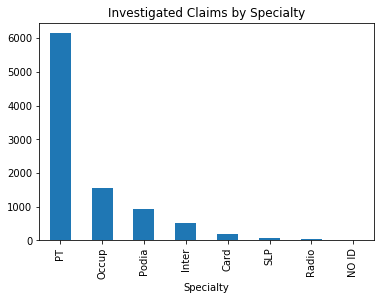

In [14]:
p = g.plot(kind='bar', title='Investigated Claims by Specialty')

## Note a a higher concentration of Physical Therapy Claims that are flagged for investigation

In [15]:
g = data.groupby(['InsuID']).size().nlargest(10);g

InsuID
13        8421
16        5035
130       4063
63        2160
59        1720
81        1708
NY1039    1695
18        1574
NY1       1108
17         853
dtype: int64

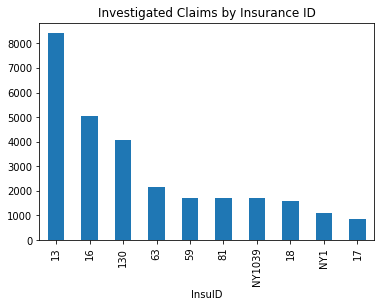

In [16]:
p = g.plot(kind='bar', title='Investigated Claims by Insurance ID')

## Note a higher concentration of claims where InsuID is 13 

In [17]:
g = data.groupby(['DoctorGroupID']).size().nlargest(10); g

DoctorGroupID
10         3760
NY10987    2501
NY10985    1848
NY10986    1694
NY10052    1692
NY10064    1646
NY9868     1579
NY2952     1413
NY10431    1160
NY10795    1100
dtype: int64

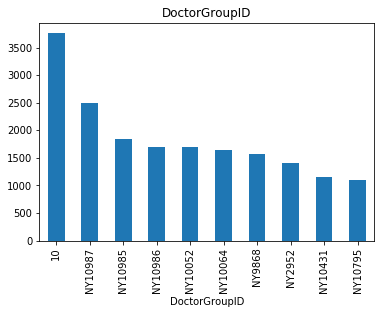

In [18]:
p = g.plot(kind='bar', title= 'DoctorGroupID')

In [19]:
g = data.groupby(['FacilityID']).size().nlargest(10); g

FacilityID
NY1037    3479
NY2686    2416
NY2687    1851
NY2688    1699
NY456     1676
NY2333    1270
NY2639    1089
NY2523    1044
NY608      996
NY2462     937
dtype: int64

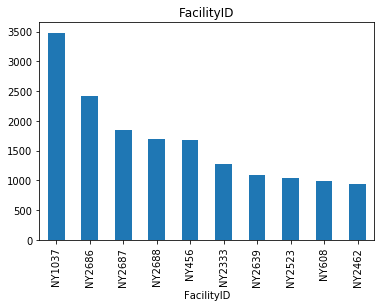

In [20]:
p = g.plot(kind='bar', title= 'FacilityID')

In [21]:
g = data.groupby(['ReferDoctorID']).size().nlargest(10); g

ReferDoctorID
NY10018    2117
NY10840    1206
NY10888    1117
NY10254     786
NY276       751
NY9864      576
NY3262      488
NY3300      462
NY1084      440
NY4219      400
dtype: int64

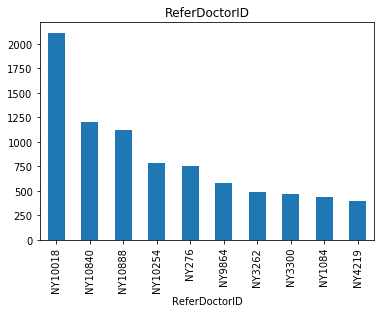

In [22]:
p = g.plot(kind='bar', title= 'ReferDoctorID')

In [23]:
g = data.groupby(['Diag1']).size().nlargest(10); g

Diag1
F41.1      2755
M54.5      2683
M25.511    1203
M54.2      1115
B35.1       863
M17.0       863
M54.17      807
M54.12      806
F90.2       783
I10         730
dtype: int64

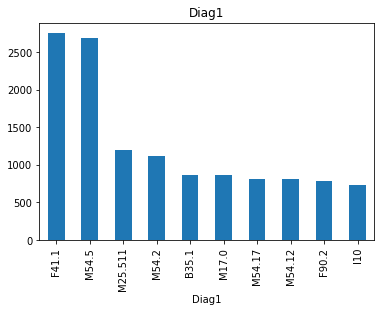

In [24]:
p = g.plot(kind='bar', title= 'Diag1')

## Note higher concnetration of claims for diagnosis code ICD 10 F41.1 Generalized anxiety disorder

In [25]:
g = data.groupby(['Proc1']).size().nlargest(10); g

Proc1
97110    9725
99213    6170
90834    2724
97530    1864
99214    1844
97112    1367
99212     864
97140     751
93306     691
93880     634
dtype: int64

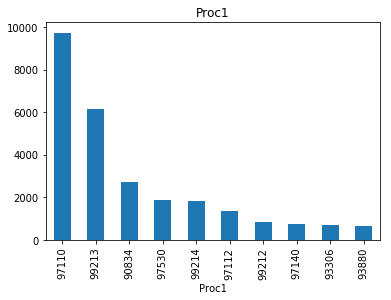

In [26]:
p = g.plot(kind='bar', title= 'Proc1')

In [27]:
g = data.groupby(['Proc1']).size().nlargest(10); g

Proc1
97110    9725
99213    6170
90834    2724
97530    1864
99214    1844
97112    1367
99212     864
97140     751
93306     691
93880     634
dtype: int64

## Note a higher concentration of Claims wher the procedure code is 97110- Therapeutic exercises

In [104]:
newData = data[['Proc1','Diag1','Specialty']].copy()

In [105]:
newData.head()

,Proc1,Diag1,Specialty
0,99214,R42,NaN
1,99214,G31.84,NaN
2,99214,R42,NaN
3,99214,R42,NaN
4,99214,R42,NaN


In [106]:
#Total number of missing values
print(newData.isna().sum())

Proc1            0
Diag1            1
Specialty    30631
dtype: int64


In [107]:

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

In [108]:
newData = newData.dropna()

In [109]:
from sklearn.preprocessing import LabelEncoder
newData = newData.astype(str)
newData.head()

,Proc1,Diag1,Specialty
548,97110,M47.817,Occup
549,97110,M54.17,Occup
550,97110,M79.605,Occup
552,97110,M47.817,Occup
553,97110,M54.17,Occup


In [113]:
DiagKeys = list(dict.fromkeys(newData["Diag1"]))
ProcKeys = list(dict.fromkeys(newData["Proc1"]))
SpecKeys = list(dict.fromkeys(newData["Specialty"]))
newData.shape

(9460, 3)

In [125]:
df = pd.DataFrame(columns=['Diag1', 'Proc1', 'Specialty'])

In [128]:
for index, row in newData.iterrows():
    Diag = DiagKeys.index(row['Diag1'])
    Proc = ProcKeys.index(row['Proc1'])
    Spec = SpecKeys.index(row['Specialty'])
    df2 = pd.DataFrame({"Diag1":[Diag],"Proc1":[Proc],"Specialty":[Spec]}) 
    #print(df2)
    frames = [df, df2]
    df = pd.concat(frames)
    print(df.shape)

(1, 3)
(2, 3)
(3, 3)
(4, 3)
(5, 3)
(6, 3)
(7, 3)
(8, 3)
(9, 3)
(10, 3)
(11, 3)
(12, 3)
(13, 3)
(14, 3)
(15, 3)
(16, 3)
(17, 3)
(18, 3)
(19, 3)
(20, 3)
(21, 3)
(22, 3)
(23, 3)
(24, 3)
(25, 3)
(26, 3)
(27, 3)
(28, 3)
(29, 3)
(30, 3)
(31, 3)
(32, 3)
(33, 3)
(34, 3)
(35, 3)
(36, 3)
(37, 3)
(38, 3)
(39, 3)
(40, 3)
(41, 3)
(42, 3)
(43, 3)
(44, 3)
(45, 3)
(46, 3)
(47, 3)
(48, 3)
(49, 3)
(50, 3)
(51, 3)
(52, 3)
(53, 3)
(54, 3)
(55, 3)
(56, 3)
(57, 3)
(58, 3)
(59, 3)
(60, 3)
(61, 3)
(62, 3)
(63, 3)
(64, 3)
(65, 3)
(66, 3)
(67, 3)
(68, 3)
(69, 3)
(70, 3)
(71, 3)
(72, 3)
(73, 3)
(74, 3)
(75, 3)
(76, 3)
(77, 3)
(78, 3)
(79, 3)
(80, 3)
(81, 3)
(82, 3)
(83, 3)
(84, 3)
(85, 3)
(86, 3)
(87, 3)
(88, 3)
(89, 3)
(90, 3)
(91, 3)
(92, 3)
(93, 3)
(94, 3)
(95, 3)
(96, 3)
(97, 3)
(98, 3)
(99, 3)
(100, 3)
(101, 3)
(102, 3)
(103, 3)
(104, 3)
(105, 3)
(106, 3)
(107, 3)
(108, 3)
(109, 3)
(110, 3)
(111, 3)
(112, 3)
(113, 3)
(114, 3)
(115, 3)
(116, 3)
(117, 3)
(118, 3)
(119, 3)
(120, 3)
(121, 3)
(122, 3)
(123, 3)
(

(925, 3)
(926, 3)
(927, 3)
(928, 3)
(929, 3)
(930, 3)
(931, 3)
(932, 3)
(933, 3)
(934, 3)
(935, 3)
(936, 3)
(937, 3)
(938, 3)
(939, 3)
(940, 3)
(941, 3)
(942, 3)
(943, 3)
(944, 3)
(945, 3)
(946, 3)
(947, 3)
(948, 3)
(949, 3)
(950, 3)
(951, 3)
(952, 3)
(953, 3)
(954, 3)
(955, 3)
(956, 3)
(957, 3)
(958, 3)
(959, 3)
(960, 3)
(961, 3)
(962, 3)
(963, 3)
(964, 3)
(965, 3)
(966, 3)
(967, 3)
(968, 3)
(969, 3)
(970, 3)
(971, 3)
(972, 3)
(973, 3)
(974, 3)
(975, 3)
(976, 3)
(977, 3)
(978, 3)
(979, 3)
(980, 3)
(981, 3)
(982, 3)
(983, 3)
(984, 3)
(985, 3)
(986, 3)
(987, 3)
(988, 3)
(989, 3)
(990, 3)
(991, 3)
(992, 3)
(993, 3)
(994, 3)
(995, 3)
(996, 3)
(997, 3)
(998, 3)
(999, 3)
(1000, 3)
(1001, 3)
(1002, 3)
(1003, 3)
(1004, 3)
(1005, 3)
(1006, 3)
(1007, 3)
(1008, 3)
(1009, 3)
(1010, 3)
(1011, 3)
(1012, 3)
(1013, 3)
(1014, 3)
(1015, 3)
(1016, 3)
(1017, 3)
(1018, 3)
(1019, 3)
(1020, 3)
(1021, 3)
(1022, 3)
(1023, 3)
(1024, 3)
(1025, 3)
(1026, 3)
(1027, 3)
(1028, 3)
(1029, 3)
(1030, 3)
(1031, 3)
(1032

(1753, 3)
(1754, 3)
(1755, 3)
(1756, 3)
(1757, 3)
(1758, 3)
(1759, 3)
(1760, 3)
(1761, 3)
(1762, 3)
(1763, 3)
(1764, 3)
(1765, 3)
(1766, 3)
(1767, 3)
(1768, 3)
(1769, 3)
(1770, 3)
(1771, 3)
(1772, 3)
(1773, 3)
(1774, 3)
(1775, 3)
(1776, 3)
(1777, 3)
(1778, 3)
(1779, 3)
(1780, 3)
(1781, 3)
(1782, 3)
(1783, 3)
(1784, 3)
(1785, 3)
(1786, 3)
(1787, 3)
(1788, 3)
(1789, 3)
(1790, 3)
(1791, 3)
(1792, 3)
(1793, 3)
(1794, 3)
(1795, 3)
(1796, 3)
(1797, 3)
(1798, 3)
(1799, 3)
(1800, 3)
(1801, 3)
(1802, 3)
(1803, 3)
(1804, 3)
(1805, 3)
(1806, 3)
(1807, 3)
(1808, 3)
(1809, 3)
(1810, 3)
(1811, 3)
(1812, 3)
(1813, 3)
(1814, 3)
(1815, 3)
(1816, 3)
(1817, 3)
(1818, 3)
(1819, 3)
(1820, 3)
(1821, 3)
(1822, 3)
(1823, 3)
(1824, 3)
(1825, 3)
(1826, 3)
(1827, 3)
(1828, 3)
(1829, 3)
(1830, 3)
(1831, 3)
(1832, 3)
(1833, 3)
(1834, 3)
(1835, 3)
(1836, 3)
(1837, 3)
(1838, 3)
(1839, 3)
(1840, 3)
(1841, 3)
(1842, 3)
(1843, 3)
(1844, 3)
(1845, 3)
(1846, 3)
(1847, 3)
(1848, 3)
(1849, 3)
(1850, 3)
(1851, 3)
(1852, 3)


(2585, 3)
(2586, 3)
(2587, 3)
(2588, 3)
(2589, 3)
(2590, 3)
(2591, 3)
(2592, 3)
(2593, 3)
(2594, 3)
(2595, 3)
(2596, 3)
(2597, 3)
(2598, 3)
(2599, 3)
(2600, 3)
(2601, 3)
(2602, 3)
(2603, 3)
(2604, 3)
(2605, 3)
(2606, 3)
(2607, 3)
(2608, 3)
(2609, 3)
(2610, 3)
(2611, 3)
(2612, 3)
(2613, 3)
(2614, 3)
(2615, 3)
(2616, 3)
(2617, 3)
(2618, 3)
(2619, 3)
(2620, 3)
(2621, 3)
(2622, 3)
(2623, 3)
(2624, 3)
(2625, 3)
(2626, 3)
(2627, 3)
(2628, 3)
(2629, 3)
(2630, 3)
(2631, 3)
(2632, 3)
(2633, 3)
(2634, 3)
(2635, 3)
(2636, 3)
(2637, 3)
(2638, 3)
(2639, 3)
(2640, 3)
(2641, 3)
(2642, 3)
(2643, 3)
(2644, 3)
(2645, 3)
(2646, 3)
(2647, 3)
(2648, 3)
(2649, 3)
(2650, 3)
(2651, 3)
(2652, 3)
(2653, 3)
(2654, 3)
(2655, 3)
(2656, 3)
(2657, 3)
(2658, 3)
(2659, 3)
(2660, 3)
(2661, 3)
(2662, 3)
(2663, 3)
(2664, 3)
(2665, 3)
(2666, 3)
(2667, 3)
(2668, 3)
(2669, 3)
(2670, 3)
(2671, 3)
(2672, 3)
(2673, 3)
(2674, 3)
(2675, 3)
(2676, 3)
(2677, 3)
(2678, 3)
(2679, 3)
(2680, 3)
(2681, 3)
(2682, 3)
(2683, 3)
(2684, 3)


(3485, 3)
(3486, 3)
(3487, 3)
(3488, 3)
(3489, 3)
(3490, 3)
(3491, 3)
(3492, 3)
(3493, 3)
(3494, 3)
(3495, 3)
(3496, 3)
(3497, 3)
(3498, 3)
(3499, 3)
(3500, 3)
(3501, 3)
(3502, 3)
(3503, 3)
(3504, 3)
(3505, 3)
(3506, 3)
(3507, 3)
(3508, 3)
(3509, 3)
(3510, 3)
(3511, 3)
(3512, 3)
(3513, 3)
(3514, 3)
(3515, 3)
(3516, 3)
(3517, 3)
(3518, 3)
(3519, 3)
(3520, 3)
(3521, 3)
(3522, 3)
(3523, 3)
(3524, 3)
(3525, 3)
(3526, 3)
(3527, 3)
(3528, 3)
(3529, 3)
(3530, 3)
(3531, 3)
(3532, 3)
(3533, 3)
(3534, 3)
(3535, 3)
(3536, 3)
(3537, 3)
(3538, 3)
(3539, 3)
(3540, 3)
(3541, 3)
(3542, 3)
(3543, 3)
(3544, 3)
(3545, 3)
(3546, 3)
(3547, 3)
(3548, 3)
(3549, 3)
(3550, 3)
(3551, 3)
(3552, 3)
(3553, 3)
(3554, 3)
(3555, 3)
(3556, 3)
(3557, 3)
(3558, 3)
(3559, 3)
(3560, 3)
(3561, 3)
(3562, 3)
(3563, 3)
(3564, 3)
(3565, 3)
(3566, 3)
(3567, 3)
(3568, 3)
(3569, 3)
(3570, 3)
(3571, 3)
(3572, 3)
(3573, 3)
(3574, 3)
(3575, 3)
(3576, 3)
(3577, 3)
(3578, 3)
(3579, 3)
(3580, 3)
(3581, 3)
(3582, 3)
(3583, 3)
(3584, 3)


(4328, 3)
(4329, 3)
(4330, 3)
(4331, 3)
(4332, 3)
(4333, 3)
(4334, 3)
(4335, 3)
(4336, 3)
(4337, 3)
(4338, 3)
(4339, 3)
(4340, 3)
(4341, 3)
(4342, 3)
(4343, 3)
(4344, 3)
(4345, 3)
(4346, 3)
(4347, 3)
(4348, 3)
(4349, 3)
(4350, 3)
(4351, 3)
(4352, 3)
(4353, 3)
(4354, 3)
(4355, 3)
(4356, 3)
(4357, 3)
(4358, 3)
(4359, 3)
(4360, 3)
(4361, 3)
(4362, 3)
(4363, 3)
(4364, 3)
(4365, 3)
(4366, 3)
(4367, 3)
(4368, 3)
(4369, 3)
(4370, 3)
(4371, 3)
(4372, 3)
(4373, 3)
(4374, 3)
(4375, 3)
(4376, 3)
(4377, 3)
(4378, 3)
(4379, 3)
(4380, 3)
(4381, 3)
(4382, 3)
(4383, 3)
(4384, 3)
(4385, 3)
(4386, 3)
(4387, 3)
(4388, 3)
(4389, 3)
(4390, 3)
(4391, 3)
(4392, 3)
(4393, 3)
(4394, 3)
(4395, 3)
(4396, 3)
(4397, 3)
(4398, 3)
(4399, 3)
(4400, 3)
(4401, 3)
(4402, 3)
(4403, 3)
(4404, 3)
(4405, 3)
(4406, 3)
(4407, 3)
(4408, 3)
(4409, 3)
(4410, 3)
(4411, 3)
(4412, 3)
(4413, 3)
(4414, 3)
(4415, 3)
(4416, 3)
(4417, 3)
(4418, 3)
(4419, 3)
(4420, 3)
(4421, 3)
(4422, 3)
(4423, 3)
(4424, 3)
(4425, 3)
(4426, 3)
(4427, 3)


(5186, 3)
(5187, 3)
(5188, 3)
(5189, 3)
(5190, 3)
(5191, 3)
(5192, 3)
(5193, 3)
(5194, 3)
(5195, 3)
(5196, 3)
(5197, 3)
(5198, 3)
(5199, 3)
(5200, 3)
(5201, 3)
(5202, 3)
(5203, 3)
(5204, 3)
(5205, 3)
(5206, 3)
(5207, 3)
(5208, 3)
(5209, 3)
(5210, 3)
(5211, 3)
(5212, 3)
(5213, 3)
(5214, 3)
(5215, 3)
(5216, 3)
(5217, 3)
(5218, 3)
(5219, 3)
(5220, 3)
(5221, 3)
(5222, 3)
(5223, 3)
(5224, 3)
(5225, 3)
(5226, 3)
(5227, 3)
(5228, 3)
(5229, 3)
(5230, 3)
(5231, 3)
(5232, 3)
(5233, 3)
(5234, 3)
(5235, 3)
(5236, 3)
(5237, 3)
(5238, 3)
(5239, 3)
(5240, 3)
(5241, 3)
(5242, 3)
(5243, 3)
(5244, 3)
(5245, 3)
(5246, 3)
(5247, 3)
(5248, 3)
(5249, 3)
(5250, 3)
(5251, 3)
(5252, 3)
(5253, 3)
(5254, 3)
(5255, 3)
(5256, 3)
(5257, 3)
(5258, 3)
(5259, 3)
(5260, 3)
(5261, 3)
(5262, 3)
(5263, 3)
(5264, 3)
(5265, 3)
(5266, 3)
(5267, 3)
(5268, 3)
(5269, 3)
(5270, 3)
(5271, 3)
(5272, 3)
(5273, 3)
(5274, 3)
(5275, 3)
(5276, 3)
(5277, 3)
(5278, 3)
(5279, 3)
(5280, 3)
(5281, 3)
(5282, 3)
(5283, 3)
(5284, 3)
(5285, 3)


(6037, 3)
(6038, 3)
(6039, 3)
(6040, 3)
(6041, 3)
(6042, 3)
(6043, 3)
(6044, 3)
(6045, 3)
(6046, 3)
(6047, 3)
(6048, 3)
(6049, 3)
(6050, 3)
(6051, 3)
(6052, 3)
(6053, 3)
(6054, 3)
(6055, 3)
(6056, 3)
(6057, 3)
(6058, 3)
(6059, 3)
(6060, 3)
(6061, 3)
(6062, 3)
(6063, 3)
(6064, 3)
(6065, 3)
(6066, 3)
(6067, 3)
(6068, 3)
(6069, 3)
(6070, 3)
(6071, 3)
(6072, 3)
(6073, 3)
(6074, 3)
(6075, 3)
(6076, 3)
(6077, 3)
(6078, 3)
(6079, 3)
(6080, 3)
(6081, 3)
(6082, 3)
(6083, 3)
(6084, 3)
(6085, 3)
(6086, 3)
(6087, 3)
(6088, 3)
(6089, 3)
(6090, 3)
(6091, 3)
(6092, 3)
(6093, 3)
(6094, 3)
(6095, 3)
(6096, 3)
(6097, 3)
(6098, 3)
(6099, 3)
(6100, 3)
(6101, 3)
(6102, 3)
(6103, 3)
(6104, 3)
(6105, 3)
(6106, 3)
(6107, 3)
(6108, 3)
(6109, 3)
(6110, 3)
(6111, 3)
(6112, 3)
(6113, 3)
(6114, 3)
(6115, 3)
(6116, 3)
(6117, 3)
(6118, 3)
(6119, 3)
(6120, 3)
(6121, 3)
(6122, 3)
(6123, 3)
(6124, 3)
(6125, 3)
(6126, 3)
(6127, 3)
(6128, 3)
(6129, 3)
(6130, 3)
(6131, 3)
(6132, 3)
(6133, 3)
(6134, 3)
(6135, 3)
(6136, 3)


(6900, 3)
(6901, 3)
(6902, 3)
(6903, 3)
(6904, 3)
(6905, 3)
(6906, 3)
(6907, 3)
(6908, 3)
(6909, 3)
(6910, 3)
(6911, 3)
(6912, 3)
(6913, 3)
(6914, 3)
(6915, 3)
(6916, 3)
(6917, 3)
(6918, 3)
(6919, 3)
(6920, 3)
(6921, 3)
(6922, 3)
(6923, 3)
(6924, 3)
(6925, 3)
(6926, 3)
(6927, 3)
(6928, 3)
(6929, 3)
(6930, 3)
(6931, 3)
(6932, 3)
(6933, 3)
(6934, 3)
(6935, 3)
(6936, 3)
(6937, 3)
(6938, 3)
(6939, 3)
(6940, 3)
(6941, 3)
(6942, 3)
(6943, 3)
(6944, 3)
(6945, 3)
(6946, 3)
(6947, 3)
(6948, 3)
(6949, 3)
(6950, 3)
(6951, 3)
(6952, 3)
(6953, 3)
(6954, 3)
(6955, 3)
(6956, 3)
(6957, 3)
(6958, 3)
(6959, 3)
(6960, 3)
(6961, 3)
(6962, 3)
(6963, 3)
(6964, 3)
(6965, 3)
(6966, 3)
(6967, 3)
(6968, 3)
(6969, 3)
(6970, 3)
(6971, 3)
(6972, 3)
(6973, 3)
(6974, 3)
(6975, 3)
(6976, 3)
(6977, 3)
(6978, 3)
(6979, 3)
(6980, 3)
(6981, 3)
(6982, 3)
(6983, 3)
(6984, 3)
(6985, 3)
(6986, 3)
(6987, 3)
(6988, 3)
(6989, 3)
(6990, 3)
(6991, 3)
(6992, 3)
(6993, 3)
(6994, 3)
(6995, 3)
(6996, 3)
(6997, 3)
(6998, 3)
(6999, 3)


(7766, 3)
(7767, 3)
(7768, 3)
(7769, 3)
(7770, 3)
(7771, 3)
(7772, 3)
(7773, 3)
(7774, 3)
(7775, 3)
(7776, 3)
(7777, 3)
(7778, 3)
(7779, 3)
(7780, 3)
(7781, 3)
(7782, 3)
(7783, 3)
(7784, 3)
(7785, 3)
(7786, 3)
(7787, 3)
(7788, 3)
(7789, 3)
(7790, 3)
(7791, 3)
(7792, 3)
(7793, 3)
(7794, 3)
(7795, 3)
(7796, 3)
(7797, 3)
(7798, 3)
(7799, 3)
(7800, 3)
(7801, 3)
(7802, 3)
(7803, 3)
(7804, 3)
(7805, 3)
(7806, 3)
(7807, 3)
(7808, 3)
(7809, 3)
(7810, 3)
(7811, 3)
(7812, 3)
(7813, 3)
(7814, 3)
(7815, 3)
(7816, 3)
(7817, 3)
(7818, 3)
(7819, 3)
(7820, 3)
(7821, 3)
(7822, 3)
(7823, 3)
(7824, 3)
(7825, 3)
(7826, 3)
(7827, 3)
(7828, 3)
(7829, 3)
(7830, 3)
(7831, 3)
(7832, 3)
(7833, 3)
(7834, 3)
(7835, 3)
(7836, 3)
(7837, 3)
(7838, 3)
(7839, 3)
(7840, 3)
(7841, 3)
(7842, 3)
(7843, 3)
(7844, 3)
(7845, 3)
(7846, 3)
(7847, 3)
(7848, 3)
(7849, 3)
(7850, 3)
(7851, 3)
(7852, 3)
(7853, 3)
(7854, 3)
(7855, 3)
(7856, 3)
(7857, 3)
(7858, 3)
(7859, 3)
(7860, 3)
(7861, 3)
(7862, 3)
(7863, 3)
(7864, 3)
(7865, 3)


(8653, 3)
(8654, 3)
(8655, 3)
(8656, 3)
(8657, 3)
(8658, 3)
(8659, 3)
(8660, 3)
(8661, 3)
(8662, 3)
(8663, 3)
(8664, 3)
(8665, 3)
(8666, 3)
(8667, 3)
(8668, 3)
(8669, 3)
(8670, 3)
(8671, 3)
(8672, 3)
(8673, 3)
(8674, 3)
(8675, 3)
(8676, 3)
(8677, 3)
(8678, 3)
(8679, 3)
(8680, 3)
(8681, 3)
(8682, 3)
(8683, 3)
(8684, 3)
(8685, 3)
(8686, 3)
(8687, 3)
(8688, 3)
(8689, 3)
(8690, 3)
(8691, 3)
(8692, 3)
(8693, 3)
(8694, 3)
(8695, 3)
(8696, 3)
(8697, 3)
(8698, 3)
(8699, 3)
(8700, 3)
(8701, 3)
(8702, 3)
(8703, 3)
(8704, 3)
(8705, 3)
(8706, 3)
(8707, 3)
(8708, 3)
(8709, 3)
(8710, 3)
(8711, 3)
(8712, 3)
(8713, 3)
(8714, 3)
(8715, 3)
(8716, 3)
(8717, 3)
(8718, 3)
(8719, 3)
(8720, 3)
(8721, 3)
(8722, 3)
(8723, 3)
(8724, 3)
(8725, 3)
(8726, 3)
(8727, 3)
(8728, 3)
(8729, 3)
(8730, 3)
(8731, 3)
(8732, 3)
(8733, 3)
(8734, 3)
(8735, 3)
(8736, 3)
(8737, 3)
(8738, 3)
(8739, 3)
(8740, 3)
(8741, 3)
(8742, 3)
(8743, 3)
(8744, 3)
(8745, 3)
(8746, 3)
(8747, 3)
(8748, 3)
(8749, 3)
(8750, 3)
(8751, 3)
(8752, 3)


In [129]:
print(df.head(10))

  Diag1 Proc1 Specialty
0     0     0         0
0     1     0         0
0     2     0         0
0     0     0         0
0     1     0         0
0     3     1         0
0     0     0         0
0     1     1         0
0     3     0         0
0     4     0         0


In [130]:
from sklearn.cluster import KMeans

In [131]:
kmeans = KMeans(n_clusters=3).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

[[512.73129525  36.52614642   1.17135961]
 [ 48.94577239  17.74152694   1.13485551]
 [263.16353887  39.69015703   1.20873229]]


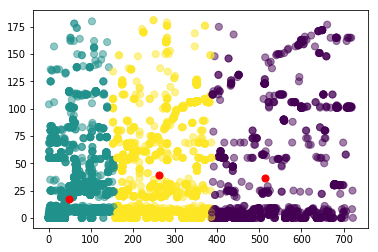

In [132]:
plt.scatter(df['Diag1'], df['Proc1'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

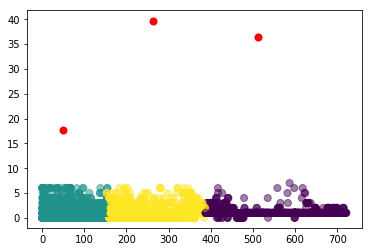

In [133]:
plt.scatter(df['Diag1'], df['Specialty'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

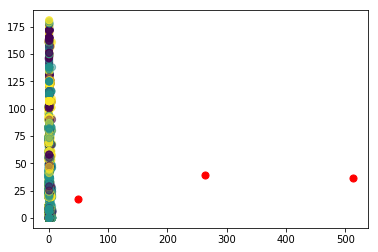

In [134]:
plt.scatter(df['Specialty'], df['Proc1'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

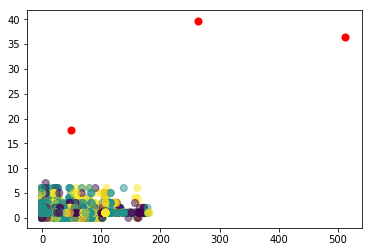

In [135]:
plt.scatter(df['Proc1'], df['Specialty'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

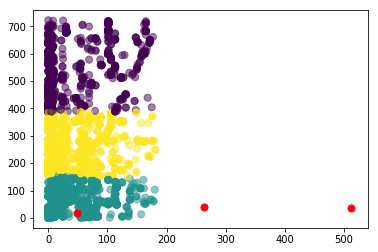

In [136]:
plt.scatter(df['Proc1'], df['Diag1'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

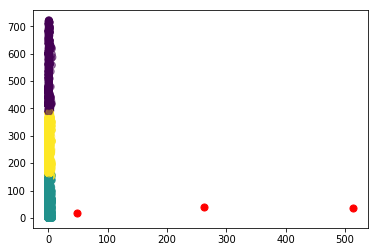

In [137]:
plt.scatter(df['Specialty'], df['Diag1'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)